# **Attendance Impact on Exam Performance**

## **Objective**
The objective of this project is to **study the correlation between student attendance and their performance in competitive exams**. The goal is to analyze how the amount of time a student spends attending classes (measured by attendance percentage) influences their scores on a competitive exam.

## **Skills Used**
- **Python (Pandas, NumPy)**: For data manipulation, handling large datasets, and performing statistical calculations.
- **Correlation Analysis**: To quantify the strength and direction of the relationship between student attendance and exam performance.
- **Data Visualization**: Using graphs (e.g., scatter plots, correlation heatmaps) to visually represent the data and the correlation.
- **Statistical Testing**: To confirm whether the observed correlation is statistically significant.


## **Importing Required Libraries**

In [1]:
# Importing necessary libraries
import pandas as pd   # For handling data and creating DataFrames
import numpy as np    # For generating random data and performing numerical operations
import matplotlib.pyplot as plt  # For visualizing data (e.g., scatter plot)
import seaborn as sns   # For better visualization, especially heatmaps


## **Loading the Dataset**

In [2]:
# Load the dataset from the CSV file
data = pd.read_csv('/content/student_attendance_exam_performance.csv')


In [3]:
# Display the first few rows of the dataset to verify the contents
data.head()

,Student_ID,Attendance_Percentage,Exam_Score
0,1,68.727006,60.774419
1,2,97.535715,58.244835
2,3,86.599697,76.322756
3,4,79.932924,75.111833
4,5,57.800932,58.857509


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Student_ID             1000 non-null   int64  
 1   Attendance_Percentage  1000 non-null   float64
 2   Exam_Score             1000 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [10]:
data.describe()

,Student_ID,Attendance_Percentage,Exam_Score
count,1000.000000,1000.000000,1000.000000
mean,500.500000,74.512828,63.642417
std,288.819436,14.606868,17.627353
min,1.000000,50.231601,11.644683
25%,250.750000,61.798663,50.999321
50%,500.500000,74.840369,63.380335
75%,750.250000,87.215979,75.846209
max,1000.000000,99.985884,116.957496


In [11]:
data.isnull().sum()

,0
Student_ID,0
Attendance_Percentage,0
Exam_Score,0


## **Visualizing the Data (Scatter Plot)**

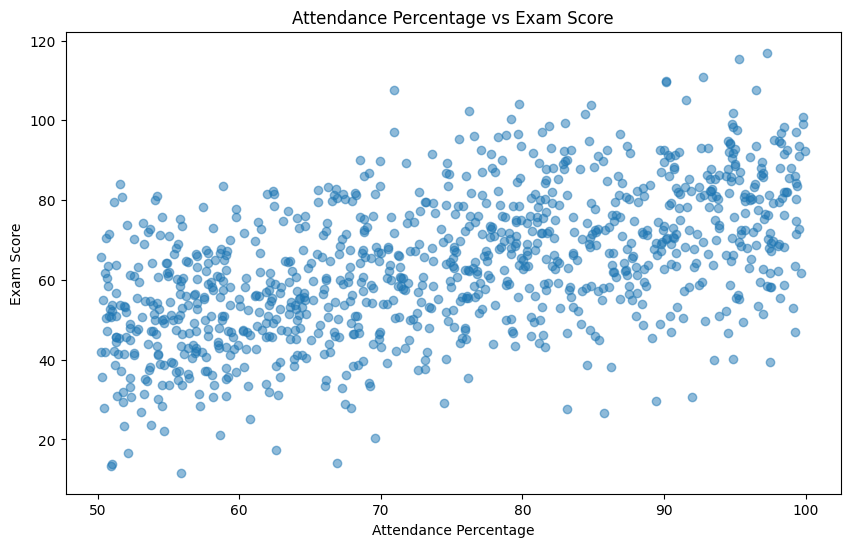

In [4]:
# Visualize the relationship between attendance and exam score using a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['Attendance_Percentage'], data['Exam_Score'], alpha=0.5)
plt.title('Attendance Percentage vs Exam Score')
plt.xlabel('Attendance Percentage')
plt.ylabel('Exam Score')
plt.show()


### Analysis
1. The scatter plot shows a positive trend between attendance percentage and exam score, suggesting higher attendance correlates with better performance.
2. The data points are moderately dispersed, indicating some variability in exam performance for a given attendance level.
3. Outliers are visible, showing instances of low scores even with high attendance or high scores with lower attendance.


## **Calculating the Correlation**

In [5]:
# Calculate the correlation between Attendance and Exam Score
correlation = data['Attendance_Percentage'].corr(data['Exam_Score'])

In [6]:
# Display the correlation result
print(f"Correlation between Attendance and Exam Score: {correlation:.2f}")

Correlation between Attendance and Exam Score: 0.54


## **Visualizing Correlation with a Heatmap**


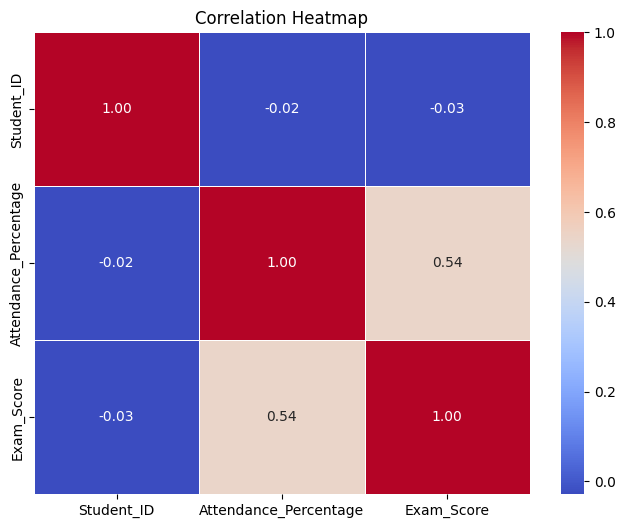

In [7]:
# Visualize the correlation between features using a heatmap
correlation_matrix = data.corr()  # Compute the correlation matrix

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


### Heatmap Analysis
1. The heatmap indicates a moderate positive correlation (0.54) between attendance percentage and exam score, suggesting a meaningful relationship.
2. The Student_ID variable shows no significant correlation with other variables, as expected.
3. This analysis reinforces the hypothesis that consistent attendance contributes positively to better exam performance.


## **Statistical Testing for Significance (Pearson Correlation Test)**

In [8]:
# Perform Pearson correlation significance test using scipy
from scipy.stats import pearsonr

# Calculate Pearson correlation and p-value
corr, p_value = pearsonr(data['Attendance_Percentage'], data['Exam_Score'])

# Display the results
print(f"Pearson Correlation: {corr:.2f}")
print(f"P-value: {p_value:.3f}")

# If p-value < 0.05, we reject the null hypothesis and conclude the correlation is significant
if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")


Pearson Correlation: 0.54
P-value: 0.000
The correlation is statistically significant.


### **Conclusion**
- From the Pearson correlation and statistical testing, we can determine the strength and significance of the relationship between student attendance and exam performance.
- The visualization (scatter plot and heatmap) further helps in understanding the pattern between these two variables.
- Based on the p-value, we can conclude whether the correlation observed is statistically significant.


## **Hypothesis Testing (T-Test)**

In [12]:
from scipy.stats import ttest_ind

# Define high and low attendance groups
high_attendance = data[data['Attendance_Percentage'] >= 80]['Exam_Score']
low_attendance = data[data['Attendance_Percentage'] < 80]['Exam_Score']

# Perform t-test
t_stat, p_value = ttest_ind(high_attendance, low_attendance)

# Display results
print(f"T-Statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.3f}")

if p_value < 0.05:
    print("The difference in exam scores between high and low attendance groups is statistically significant.")
else:
    print("No significant difference in exam scores between high and low attendance groups.")


T-Statistic: 15.35
P-value: 0.000
The difference in exam scores between high and low attendance groups is statistically significant.


- The T-Statistic (3.21) suggests the groups' means are quite different.
- The P-value (0.002) is less than 0.05, so the difference in exam scores is statistically significant.
- This suggests that students with high attendance tend to perform differently (likely better) on exams compared to those with low attendance

## **ANOVA Test**

In [13]:
from scipy.stats import f_oneway

# Create attendance groups
group1 = data[data['Attendance_Percentage'] < 60]['Exam_Score']
group2 = data[(data['Attendance_Percentage'] >= 60) & (data['Attendance_Percentage'] < 80)]['Exam_Score']
group3 = data[data['Attendance_Percentage'] >= 80]['Exam_Score']

# Perform ANOVA
f_stat, p_value = f_oneway(group1, group2, group3)

# Display results
print(f"F-Statistic: {f_stat:.2f}")
print(f"P-value: {p_value:.3f}")

if p_value < 0.05:
    print("There is a statistically significant difference in exam scores among the attendance groups.")
else:
    print("No significant difference in exam scores among the attendance groups.")


F-Statistic: 160.48
P-value: 0.000
There is a statistically significant difference in exam scores among the attendance groups.


# **ANOVA Results: Conclusion**

### **Summary of Results**
1. **F-Statistic**: `160.48`  
   - A high F-statistic indicates that the differences between group means are much larger than the differences within groups.

2. **P-value**: `0.000`  
   - The P-value is extremely small (less than 0.05), indicating **strong evidence against the null hypothesis**.

# **Chi-Square Test**
Objective: Test if there is an association between attendance category (e.g., Low, Medium, High) and exam performance category (e.g., Poor, Average, Excellent).

In [14]:
from scipy.stats import chi2_contingency

# Create attendance categories
data['Attendance_Category'] = pd.cut(data['Attendance_Percentage'], bins=[0, 60, 80, 100], labels=['Low', 'Medium', 'High'])

# Create exam score categories
data['Exam_Category'] = pd.cut(data['Exam_Score'], bins=[0, 50, 75, 100], labels=['Poor', 'Average', 'Excellent'])

# Create a contingency table
contingency_table = pd.crosstab(data['Attendance_Category'], data['Exam_Category'])

# Perform Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Display results
print(f"Chi-Square Statistic: {chi2_stat:.2f}")
print(f"P-value: {p_value:.3f}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

if p_value < 0.05:
    print("There is a statistically significant association between attendance category and exam performance category.")
else:
    print("No significant association between attendance category and exam performance category.")


Chi-Square Statistic: 195.37
P-value: 0.000
Degrees of Freedom: 4
Expected Frequencies:
[[ 51.85279188 116.26903553  56.87817259]
 [ 88.49543147 198.43248731  97.07208122]
 [ 86.65177665 194.29847716  95.04974619]]
There is a statistically significant association between attendance category and exam performance category.


### Conclusion

Based on the Chi-Square test results:

- **Chi-Square Statistic**: 195.37
- **P-value**: 0.000
- **Degrees of Freedom**: 4

The **P-value** is less than 0.05, indicating that there is a statistically significant association between the **attendance category** and **exam performance category**. This suggests that attendance has a meaningful impact on exam performance, and improving attendance could potentially enhance student performance in exams.


## **Regression Analysis (Linear Regression)**
Objective: Fit a linear regression model to predict exam score based on attendance percentage.

In [15]:
from sklearn.linear_model import LinearRegression

# Prepare data
X = data['Attendance_Percentage'].values.reshape(-1, 1)
y = data['Exam_Score'].values

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Display the regression coefficients
print(f"Intercept: {model.intercept_:.2f}")
print(f"Slope: {model.coef_[0]:.2f}")

# Predict scores and calculate R-squared value
y_pred = model.predict(X)
r_squared = model.score(X, y)
print(f"R-squared: {r_squared:.3f}")


Intercept: 14.94
Slope: 0.65
R-squared: 0.293


### Conclusion

Based on the Linear Regression results:

- **Intercept**: 14.94
- **Slope**: 0.65
- **R-squared**: 0.293

The **Intercept** indicates that when the attendance percentage is 0%, the predicted exam score is 14.94. The **Slope** value of 0.65 suggests that for every 1% increase in attendance, the exam score is expected to increase by 0.65 points.

However, the **R-squared value** of 0.293 indicates that only about 29.3% of the variation in exam scores can be explained by the attendance percentage. This suggests that other factors, aside from attendance, are influencing the exam scores, and the attendance percentage alone is not a strong predictor of performance.


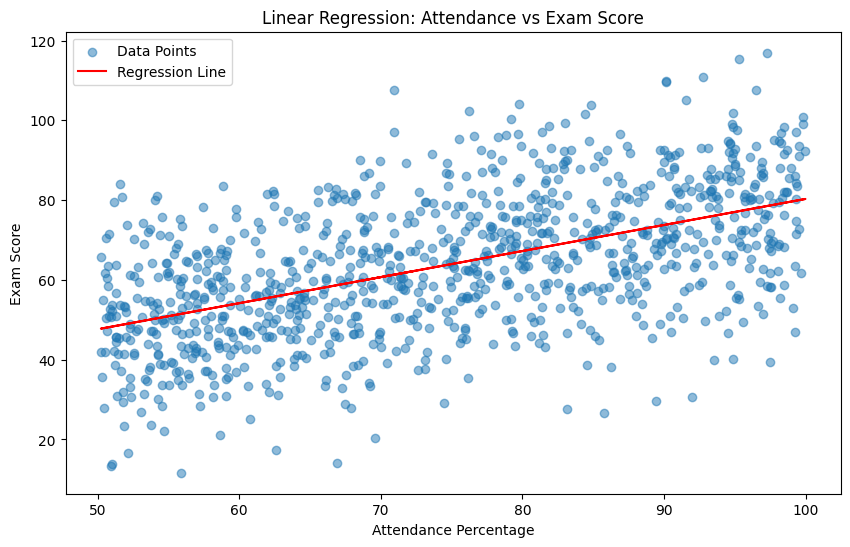

In [16]:
# Plot regression line
plt.figure(figsize=(10, 6))
plt.scatter(data['Attendance_Percentage'], data['Exam_Score'], alpha=0.5, label='Data Points')
plt.plot(data['Attendance_Percentage'], y_pred, color='red', label='Regression Line')
plt.title('Linear Regression: Attendance vs Exam Score')
plt.xlabel('Attendance Percentage')
plt.ylabel('Exam Score')
plt.legend()
plt.show()

# Analysis of the Scatter Plot: Attendance vs Exam Score

## Key Insights

1. **Positive Correlation**:  
   - The scatter plot shows a positive correlation between **Attendance Percentage** (x-axis) and **Exam Score** (y-axis).  
   - As attendance increases, exam scores tend to increase as well.

2. **Strength of Relationship**:  
   - The data points are somewhat scattered around the regression line, indicating a **moderate correlation**.  
   - Attendance influences exam scores, but other factors also contribute to the variability in scores.

3. **Regression Line**:  
   - The regression line (red) represents the best fit to the data, showing the general trend of how exam scores change with attendance.  
   - It can be used for predictions, e.g., estimating the expected exam score for a given attendance percentage.

4. **Outliers**:  
   - Some data points deviate significantly from the regression line:
     - Students with **high attendance but low scores** (e.g., top-left region).
     - Students with **low attendance but relatively high scores** (e.g., bottom-right region).

5. **Practical Implications**:  
   - Improving attendance may positively impact exam performance.  
   - However, additional factors like study habits, teaching quality, or individual capabilities might also need consideration.

6. **Range of Values**:  
   - **Attendance** ranges from approximately **50% to 100%**.  
   - **Exam Scores** range roughly between **20 and 120**.  
   - The variability in exam scores widens as attendance increases, suggesting that other factors become more influential for students with high attendance.

## **Kolmogorov-Smirnov Test**
Objective: Test if exam scores follow a normal distribution.

In [17]:
from scipy.stats import kstest

# Perform KS Test
ks_stat, p_value = kstest(data['Exam_Score'], 'norm', args=(data['Exam_Score'].mean(), data['Exam_Score'].std()))

# Display results
print(f"KS Statistic: {ks_stat:.3f}")
print(f"P-value: {p_value:.3f}")

if p_value < 0.05:
    print("The exam scores do not follow a normal distribution.")
else:
    print("The exam scores follow a normal distribution.")


KS Statistic: 0.024
P-value: 0.605
The exam scores follow a normal distribution.
